# Read a single file with multiple clients

20 processes using four processes on each of five client nodes. Each clients read seperate blocks from the file
using the following pattern (here id=(0..19))
    
    offset = 1MB*id
    while blocks to read:
        pread(1MB, offset)
        offset = offset + 19MB

Each client read 1/20 of the file.

In [59]:
import sys
import jmespath

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

import fiostats

plt.style.use('seaborn')

In [55]:
all_data = []
for hostid in range(12,17):
    all_data.append(fiostats.read_test_sequence("read_mcl/20190514T092841_drp-tst-dev{:03d}".format(hostid)))

Found for read_mcl/20190514T092841_drp-tst-dev012 1 tests
Found for read_mcl/20190514T092841_drp-tst-dev013 1 tests
Found for read_mcl/20190514T092841_drp-tst-dev014 1 tests
Found for read_mcl/20190514T092841_drp-tst-dev015 1 tests
Found for read_mcl/20190514T092841_drp-tst-dev016 1 tests


In [56]:
print(jmespath.search('[*][*].timestamp', all_data))
bw = np.array(jmespath.search('[*][*].jobs[*].read.bw_mean', all_data))
read_bw = np.array(bw) / 1024.
read_bw.shape = (20,)
print(len(read_bw), read_bw)

[[1557851353], [1557851353], [1557851355], [1557851355], [1557851352]]
20 [326.44845031 323.6824571  319.15858735 319.32389857 329.10737462
 320.07567559 319.748271   323.71368118 294.79086766 303.17160867
 293.70056522 299.20771188 325.08191919 301.08135517 308.15688101
 305.01400757 340.91023763 338.47716471 331.90803761 332.2766276 ]


Sum of all clients 6.2GiB/s


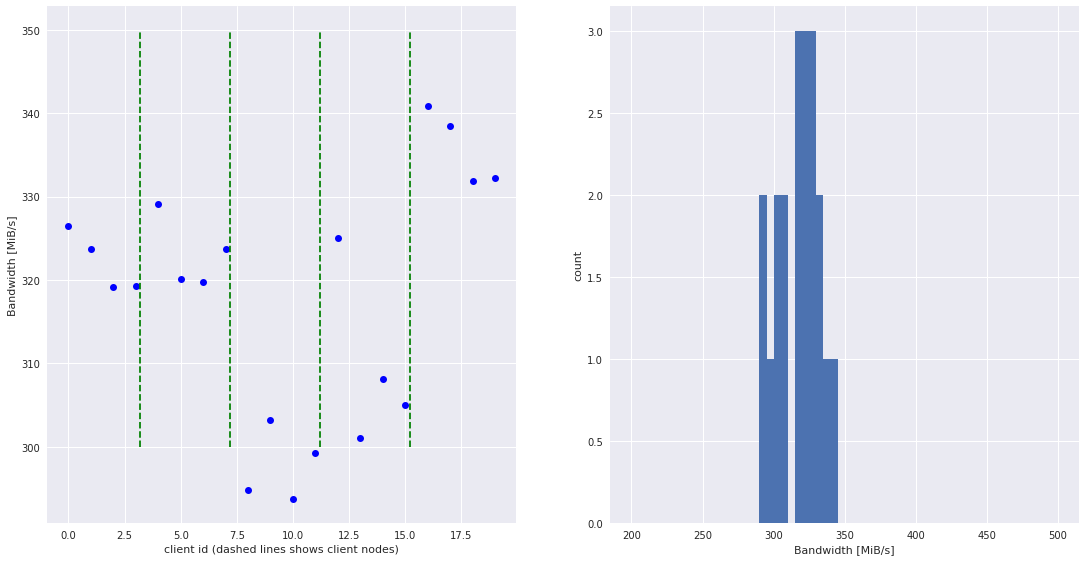

In [62]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 9.5)

x = np.arange(len(read_bw))
ax1.plot(x, read_bw, 'ob')
for host_sep in range(4):
    xp = host_sep * 4 + 3.2
    ax1.plot([xp, xp], [300, 350], 'g--', label="1GB/s/process")
ax2.hist(read_bw, bins=60, range=[200,500])
ax1.set_xlabel("client id (dashed lines shows client nodes)")
ax1.set_ylabel("Bandwidth [MiB/s]")
ax2.set_xlabel("Bandwidth [MiB/s]")
ax2.set_ylabel("count")
print("Sum of all clients {:.1f}GiB/s".format(read_bw.sum()/1024))